##Objectifs de l’étude
Ce document retranscrit une démarche de classification automatique d’unva étre realiser sur des données proviennent de l’ouvrage de Gilbert Saporta (2006 ; tableau 17.1, page 428) qui fait référence en analyse de données. Il s’agit de résumer l’information contenue dans un fichier décrivant (n = 18) véhicules à l’aide de (p = 6) variables .

In [79]:
# importation des librairies nécessaires à l'analyse des données
# classe de standarisation
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
#verifier l'imporatation du Pandas
print(pd.__version__)

1.3.5


In [81]:
carData = pd.read_table("/content/data.txt",sep=";",header=0,index_col=0)
carData

,CYL,PUISS,LONG,LARG,POIDS,V_MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165
Lancia Beta,1297,82,429,169,1080,160
Peugeot 504,1796,79,449,169,1160,154
Renault 16 TL,1565,55,424,163,1010,140
Renault 30,2664,128,452,173,1320,180


(18, 6)
               CYL       PUISS        LONG        LARG        POIDS  \
count    18.000000   18.000000   18.000000   18.000000    18.000000   
mean   1631.666667   84.611111  433.500000  166.666667  1078.833333   
std     373.929846   20.376281   22.107358    5.313689   136.957808   
min    1166.000000   55.000000  393.000000  157.000000   815.000000   
25%    1310.250000   70.750000  424.000000  162.250000  1020.000000   
50%    1577.500000   82.000000  434.500000  167.000000  1087.500000   
75%    1797.500000   98.000000  448.000000  169.750000  1126.750000   
max    2664.000000  128.000000  469.000000  177.000000  1370.000000   

            V_MAX  
count   18.000000  
mean   158.277778  
std     12.140383  
min    140.000000  
25%    151.250000  
50%    160.000000  
75%    165.000000  
max    180.000000  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d641fb4d0>,
      dtype=object)

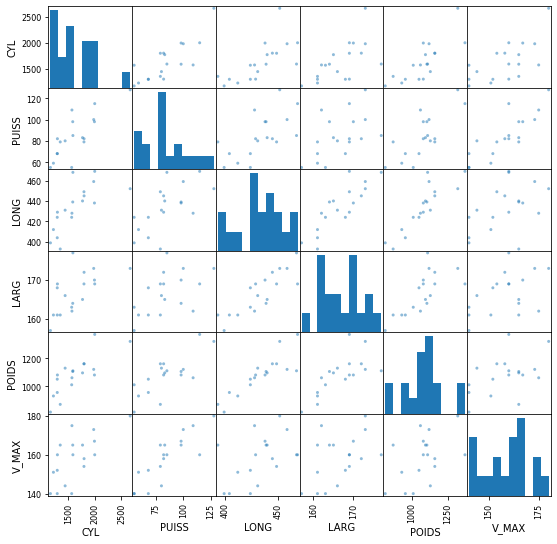

In [82]:
#dimension des données
print(carData.shape)
#statistiques descriptives
print(carData.describe())
#graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix
scatter_matrix(carData,figsize=(9,9))

Ce type de graphique n’est
jamais anodin. Nous
constatons par exemple que
> « poids » est 
corrélé avec « Long » et
« Larg »  


##  CAH : *(Classification ascendante hiérarchique)*

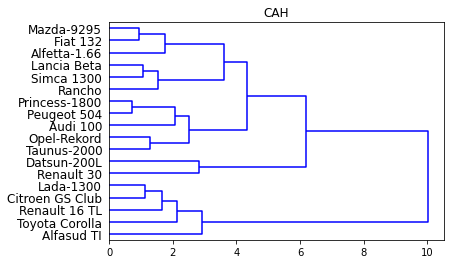

In [83]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy  import dendrogram, linkage, fcluster,fclusterdata
#générer la matrice des liens
carData_cr= preprocessing.scale(carData)
Z_dataset = linkage(carData_cr,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z_dataset,labels=carData.index,orientation='right',color_threshold=0)
plt.show()


Le dendrogramme « suggère » un découpage en 4 groupes,on
aurait pu envisager aussi un découpage en 2 groupes seulement.
Nous y reviendrons plus longuement lorsque nous mixerons
l’analyse avec une analyse en composantes principales (ACP).

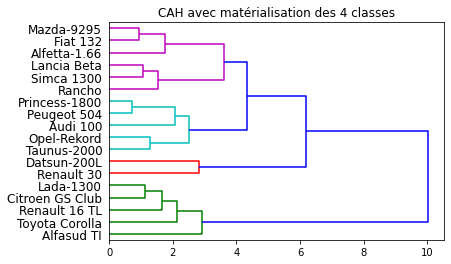

[1 3 4 1 4 4 3 1 2 1 4 3 2 3 4 4 3 1]
            Modele
1       Alfasud TI
1   Toyota Corolla
1    Renault 16 TL
1        Lada-1300
1  Citroen GS Club
2      Datsun-200L
2       Renault 30
3      Peugeot 504
3      Opel-Rekord
3         Audi 100
3    Princess-1800
3      Taunus-2000
4         Fiat 132
4      Lancia Beta
4       Simca 1300
4     Alfetta-1.66
4           Rancho
4       Mazda-9295


In [98]:
#matérialisation des 4 classes (hauteur t = 4)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z_dataset,labels=carData.index,orientation='right',color_threshold=4)
plt.show()
#découpage à la hauteur t = 4 ==> identifiants de 4 groupes obtenus
groupes_cah = fcluster(Z_dataset,t=4,criterion='distance')
print(groupes_cah)
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(carData.index[idg],groupes_cah[idg]))

## K-means : *(Méthode des centres mobiles)*

In [99]:
#k-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(carData_cr)
#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
print(pd.DataFrame(carData.index[idk],kmeans.labels_[idk]))
#distances aux centres de classes des observations
print(kmeans.transform(carData_cr))
#correspondance avec les groupes de la CAH
pd.crosstab(groupes_cah,kmeans.labels_)

            Modele
0       Simca 1300
0       Mazda-9295
0         Fiat 132
0      Lancia Beta
0           Rancho
0     Alfetta-1.66
1       Renault 30
2         Audi 100
2      Peugeot 504
2      Opel-Rekord
2      Taunus-2000
2    Princess-1800
2      Datsun-200L
3       Alfasud TI
3    Renault 16 TL
3  Citroen GS Club
3   Toyota Corolla
3        Lada-1300
[[2.6836179  6.72207978 4.47315222 1.85319033]
 [2.78522723 4.47215643 1.54488355 4.83389322]
 [1.44201659 5.98137949 2.83866278 1.99181415]
 [2.48244678 7.16807909 4.2764535  0.55277818]
 [0.8913284  4.329064   1.90838607 3.26359206]
 [0.8846434  5.23622169 2.2030692  2.71162628]
 [1.5745264  4.33004061 1.15760943 3.55347739]
 [2.49966267 6.71591639 3.75293232 1.54483578]
 [4.85231257 0.         3.42671824 7.18414872]
 [3.94979937 8.49460739 5.70841696 1.37932769]
 [1.86369756 4.44574168 2.85856929 3.69211781]
 [1.72602535 4.01759105 0.81849045 3.86470679]
 [3.45341909 2.8338347  2.10641507 5.85471145]
 [1.82930254 3.30639912 1.22

col_0,0,1,2,3
row_0,,,,
1,0,0,0,5
2,0,1,1,0
3,0,0,5,0
4,6,0,0,0


> Correspondance CAH – K-Means
Le groupe 4 de la CAH coïncide avec
le groupe 0 des K-Means. Après, il y a
certes des correspondances, mais
elles ne sont pas exactes.

<b>K-MEANS</b>, à la différence de la <b>CAH</b>, ne fournit pas d'outils d'aide à la détection du nombre de
classes. Nous devons les programmer sous Python ou utiliser des procédures proposées par
des packages dédiés. Le schéma est souvent le même : on fait varier le nombre de groupes et
on surveille l'évolution d'un indicateur de qualité de la solution c.-à-d. l'aptitude des individus à
être plus proches de ses congénères du même groupe que des individus des autres groupes.
Dans ce qui suit, on calcule la métrique « silhouette » pour différents nombres de groupes issus
de la méthode des centres mobiles.

[0.24435973 0.1698149  0.08874711 0.04558579 0.06239787 0.10721793
 0.06444523 0.0302856  0.04969296]


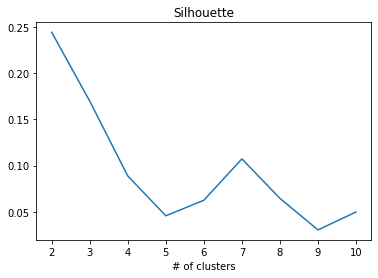

In [100]:
 #librairie pour évaluation des partitions
from sklearn import metrics 
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange (9, dtype="double")
for k in np.arange (9):
  km = cluster. KMeans (n_clusters=k+2)
  km. fit (carData)
  res[k] = metrics.silhouette_score (carData_cr, km. labels_)
print (res)
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange (2,11,1), res)
plt.show()

La partition en k = 2
groupes semble la
meilleure au sens de la
métrique « silhouette ». 

## Interprétation des classes


* L’idée est de comparer les moyennes des variables actives conditionnellement aux groupes. Il
est possible de quantifier globalement l’amplitude des écarts avec la proportion de variance
expliquée (carré du rapport de corrélation). La démarche peut être étendue aux variables
illustratives. Pour les catégorielles, nous confronterions les distributions conditionnelles.
* L’approche est simple et les résultats faciles à lire. Rappelons cependant que nous ne tenons
pas compte des liaisons entre les variables dans ce cas

In [101]:
#moyenne par variable
m = carData.mean()
#TSS
TSS = carData.shape[0]*carData.var(ddof=0)
print(TSS)
#data.frame conditionnellement aux groupes
gb = carData.groupby(kmeans.labels_)
#effectifs conditionnels
nk = gb.size()
print(nk)
#moyennes conditionnelles
mk = gb.mean()
print(mk)
#pour chaque groupe écart à la moyenne par variable
EMk = (mk-m)**2
#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)
#somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
print(BSS)
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes
#pour chaque variable
R2 = BSS/TSS
print(R2)

CYL      2.377000e+06
PUISS    7.058278e+03
LONG     8.308500e+03
LARG     4.800000e+02
POIDS    3.188765e+05
V_MAX    2.505611e+03
dtype: float64
0    6
1    1
2    6
3    5
dtype: int64
           CYL       PUISS        LONG        LARG        POIDS       V_MAX
0  1492.833333   86.666667  431.833333  165.666667  1086.500000  160.166667
1  2664.000000  128.000000  452.000000  173.000000  1320.000000  180.000000
2  1858.666667   93.166667  454.666667  171.666667  1166.666667  162.000000
3  1319.400000   63.200000  406.400000  160.600000   916.000000  147.200000
CYL      1.978087e+06
PUISS    4.639311e+03
LONG     6.719133e+03
LARG     3.801333e+02
POIDS    2.373757e+05
V_MAX    1.189978e+03
dtype: float64
CYL      0.832178
PUISS    0.657287
LONG     0.808706
LARG     0.791944
POIDS    0.744413
V_MAX    0.474925
dtype: float64


> Le groupe n°3 est fortement
déterminé par ces variables, les
moyennes conditionnelles sont très
différentes.

Avec l’ACP, nous tenons compte des liaisons entre les variables. L’analyse est
plus riche. Mais il faut savoir lire correctement les sorties de [l’ACP](https://github.com/drissi2002/ACP/blob/main/ACP-initiation.ipynb).


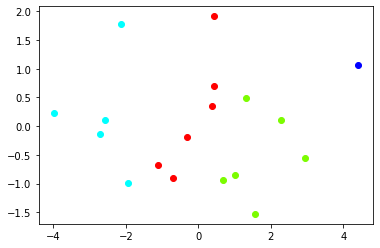

In [102]:
#ACP
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(carData_cr)
#projeter dans le plan factoriel
#avec un code couleur différent selon le groupe
#remarquer le rôle de zip() dans la boucle
for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
  plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show() 

(13, 6)


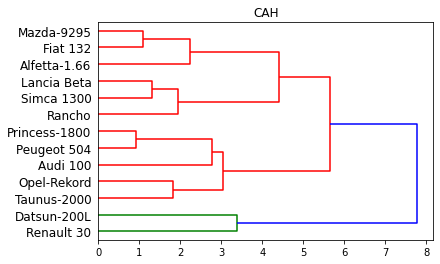

[2 2 2 2 2 1 2 2 1 2 2 2 2]


In [103]:
#retirer des observations le groupe n°3 du k-means précédent
carData_subset = carData.iloc[kmeans.labels_!=3,:]
print(carData_subset.shape)
#centrer et réduire
carData_subset_cr = preprocessing.scale(carData_subset)
#générer la matrice des liens
Z_subset = linkage(carData_subset_cr,method='ward',metric='euclidean')
#cah et affichage du dendrogramme
plt.title("CAH")
dendrogram(Z_subset,labels=carData_subset.index,orientation='right',color_threshold=7)
plt.show()
#groupes
groupes_subset_cah = fcluster(Z_subset,t=7,criterion='distance')
print(groupes_subset_cah)

## ACP 

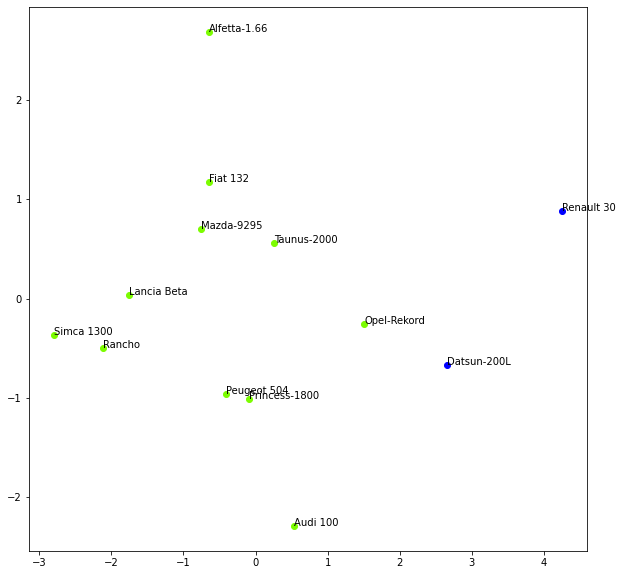

In [104]:
#ACP
acp_subset = PCA(n_components=2).fit_transform(carData_subset_cr)
#projeter dans le plan factoriel
#avec un code couleur selon le groupe
#remarquer le rôle de zip()
plt.figure(figsize=(10,10))
for couleur,k in zip(['blue','lawngreen','aqua'],[1,2,3]):
  plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)

#mettre les labels des points
#remarquer le rôle de enumerate()
for i,label in enumerate(carData_subset.index):
  plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))
plt.show()